# Multiple regression with the problem of correlated predictors

### Becca Hammersla, MPO624, Spring 2018

Deep in a rainforest, where it rains every day,
convective rainfall (the daily total, in cm) depends on many factors or ingredients.
Two main ones are Lapse Rate (LR, in K/km) and Precipitable Water (PW in mm). These are correlated: unstable days are also moist days!

Others include the happenstance of turbulent triggering processes, etc. Also convection may have nonlinear dependences on factors, which could be Taylor expanded as dependence on $LR^2, PW^2, LR \times PW$, etc. etc. All these other and nonlinear terms can be lumped together as "other".

So let's build nature's secret process as a sum of 3 factors: LR, PW, and 'other'.

In [3]:
# Building Nature's secret reality. Don't look, this is mysterious. (OK, yeah, I am using random numbers)
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# Let's make some weather: 365 days. Remember, LR and PW are correlated!
N=365

# The factors that govern rainfall R. Don't look! Nature is secretly a random number generator!
LR = np.random.randn(N); ntosig = 0.8 ; PW = LR + np.random.randn(N)*ntosig; other = np.random.randn(N)
R = 1.0*LR + 2.0*PW + other
   
fig,ax=plt.subplots(1,1)
cs = ax.scatter(LR, PW, c=R, cmap=plt.cm.RdBu_r, vmin=-5, vmax=5); plt.xlim(-5, 5); plt.ylim(-5, 5)

ax.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax.set_ylabel('Precipitable Water anomaly PW (K/km)')
ax.set_title('Rainfall R (cm) vs. 2 factors')
cbar = fig.colorbar(cs)


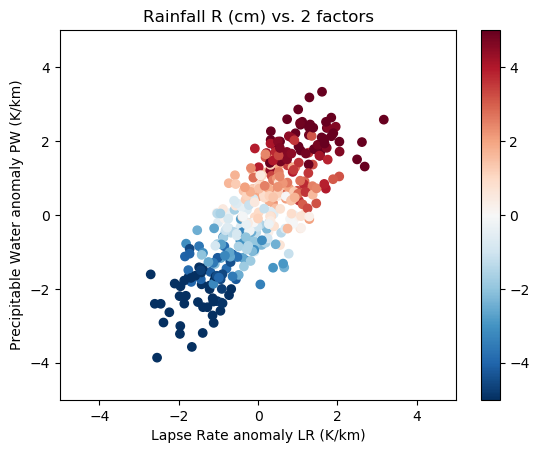

In [4]:
fig

Intrepid scientists measure LR and PW
They also try to measure R, but with too few raingauges and imperfect radar¶

In [5]:
Rmeas_error = np.random.randn(N)*0.5
Rmeas = R + Rmeas_error

Let's explore our dataset: LR, PW, and $R_{meas}$

Text(0,0.5,'Precipitable Water anomaly PW (mm)')

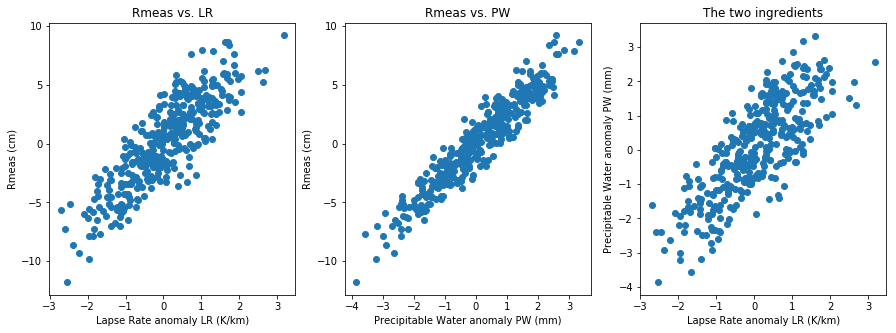

In [6]:
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(LR, Rmeas) 
ax1.set_title('Rmeas vs. LR')
ax1.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax1.set_ylabel('Rmeas (cm)')

ax2.scatter(PW, Rmeas) 
ax2.set_title('Rmeas vs. PW')
ax2.set_xlabel('Precipitable Water anomaly PW (mm)')
ax2.set_ylabel('Rmeas (cm)')

ax3.scatter(LR, PW) 
ax3.set_title('The two ingredients')
ax3.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax3.set_ylabel('Precipitable Water anomaly PW (mm)')

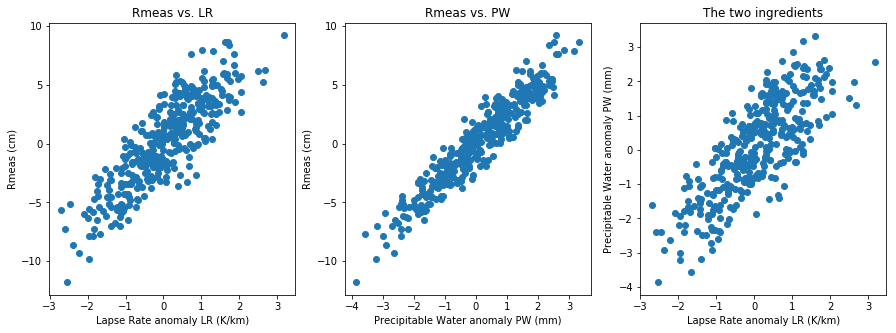

In [7]:
fig2

- A lapse-rate extremist postulates $R_{meas} = a \times LR$ is the one true signal

- A PW extremist postulates $R_{meas} = b \times PW$ is the one true signal

- A generalizer postulates $R_{meas} = c \times LR + d \times PW$ is nature's process

Can we adjudicate, from noisy $R_{meas}$ data, with "other" factors unmeasured?
Is c=a? Is d=b?


## EXERCISE 1: overlay the line aLR on the Rmeas-LR scatter plot


In [8]:
# The LR extremist's regression¶

a = np.corrcoef(LR,Rmeas)[1,0] *np.std(Rmeas)/np.std(LR)
print('a = ',a, 'cm per (K/km)')

a =  3.091319257377989 cm per (K/km)


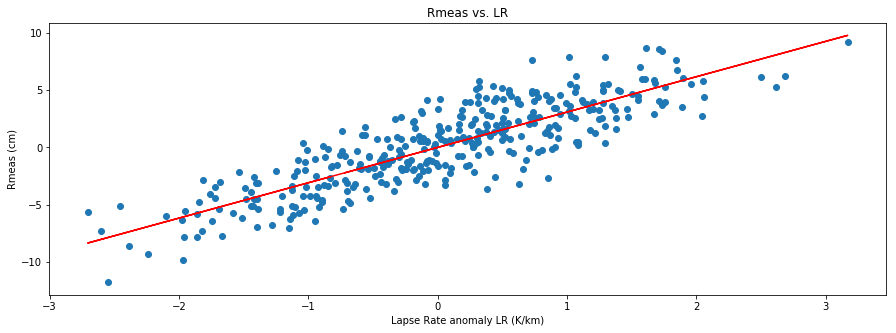

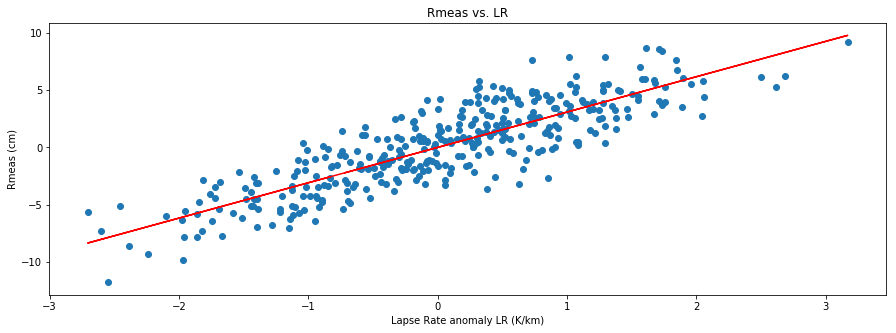

In [9]:
fig3, ax1 = plt.subplots(1, 1, figsize=(15,5))
ax1.scatter(LR, Rmeas) 
ax1.set_title('Rmeas vs. LR')
ax1.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax1.set_ylabel('Rmeas (cm)')

aLR = a*LR
ax1.plot(LR, aLR, color="red")

fig3

## EXERCISE 2: overlay the line bPW on the Rmeas-PW scatter plot


In [10]:
# The PW extremist's regression

b = np.corrcoef(PW,Rmeas)[1,0] *np.std(Rmeas)/np.std(PW)
print('b = ',b, 'cm per (mm)')

b =  2.5785975648327666 cm per (mm)


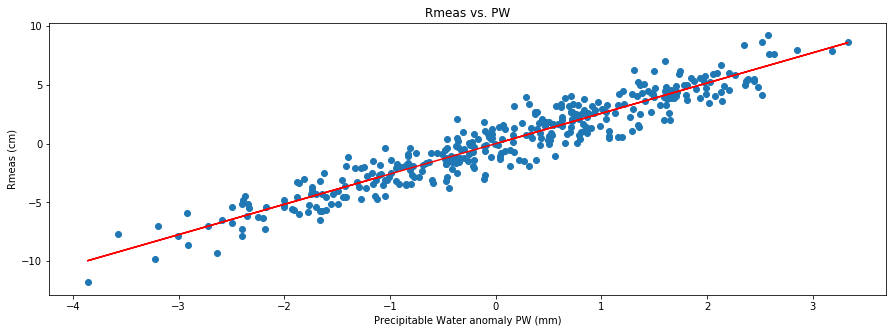

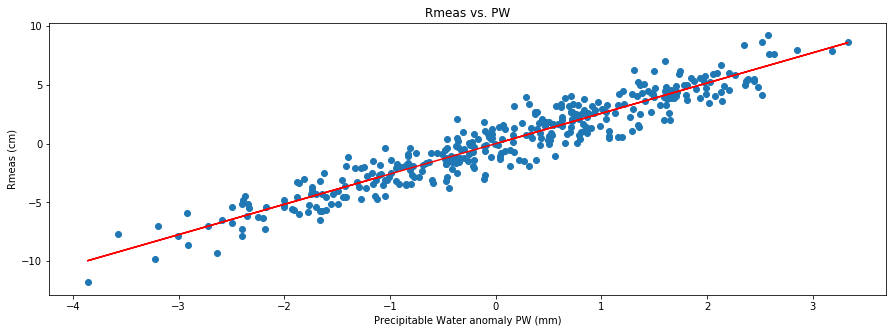

In [11]:
fig4, ax2 = plt.subplots(1, 1, figsize=(15,5))
ax2.scatter(PW, Rmeas) 
ax2.set_title('Rmeas vs. PW')
ax2.set_xlabel('Precipitable Water anomaly PW (mm)')
ax2.set_ylabel('Rmeas (cm)')

bPW = b*PW
ax2.plot(PW, bPW, color="red")

fig4

## EXERCISE 3: Express the below results graphically

In [12]:
# The generalizer's regression

from sklearn import linear_model
reg = linear_model.LinearRegression()

# FOr 2D interpolation, pack up the data in right shaped container:
indata = np.zeros( (N,2) )
indata[:,0] = LR
indata[:,1] = PW

# Fit and display
reg.fit(indata,Rmeas)
print('c, d = ', reg.coef_, 'cm per K/km, and cm per mm')

c, d =  [0.96778276 2.00562858] cm per K/km, and cm per mm


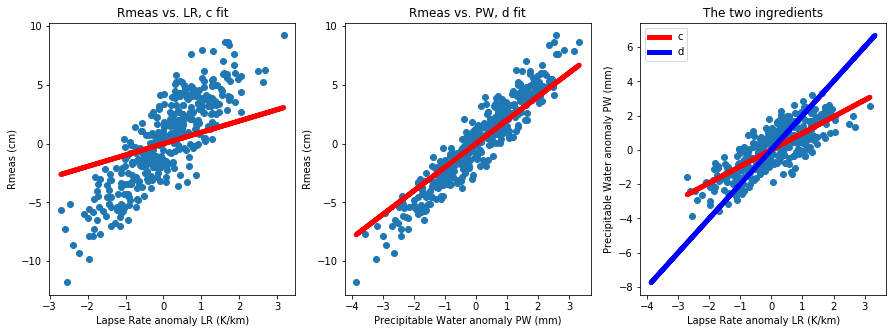

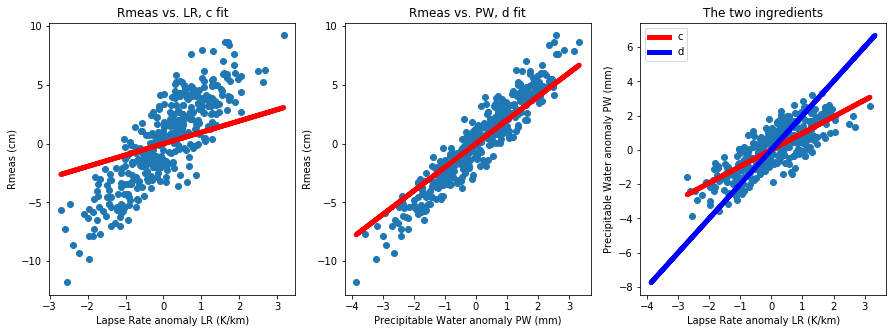

In [16]:
# Uses above linear fit vars but with c,d as slope
c = reg.coef_[0]
d = reg.coef_[1]

fig5, (LR2, PW2, ax3) = plt.subplots(1, 3, figsize=(15,5))

LR2.scatter(LR, Rmeas)
LR2.plot(LR, LR*c, 'r-', linewidth=5)
LR2.set_title('Rmeas vs. LR, c fit')
LR2.set_xlabel('Lapse Rate anomaly LR (K/km)')
LR2.set_ylabel('Rmeas (cm)')

PW2.scatter(PW, Rmeas) 
PW2.plot(PW,   PW*d,'r-', linewidth=5)
PW2.set_title('Rmeas vs. PW, d fit')
PW2.set_xlabel('Precipitable Water anomaly PW (mm)')
PW2.set_ylabel('Rmeas (cm)')

ax3.scatter(LR, PW)
ax3.plot(LR, LR*c,'r-', linewidth=5, label = 'c')
ax3.plot(PW, PW*d, 'b-', linewidth=5, label = 'd')
ax3.legend()
ax3.set_title('The two ingredients')
ax3.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax3.set_ylabel('Precipitable Water anomaly PW (mm)')

fig5

## EXERCISE 4: Find the residuals, the unexplained variance
that is, $(R_{meas} - model)^2$
for all 3 postulated models.
Can you say that one model is better than another?


In [17]:
model_1 = LR*a
model_2 = PW*b
model_3 = LR*c + PW*d

res1 = (Rmeas-model_1)**2
res2 = (Rmeas-model_2)**2
res3 = (Rmeas-model_3)**2

## EXERCISE 5: Explain what is wrong with postulating
$R_{meas} = a \times LR + b \times PW$
To do this, scatter plot its residual against $R_{meas}$.

What principle about postulated models is violated?

NameError: name 'LR_PW_2' is not defined

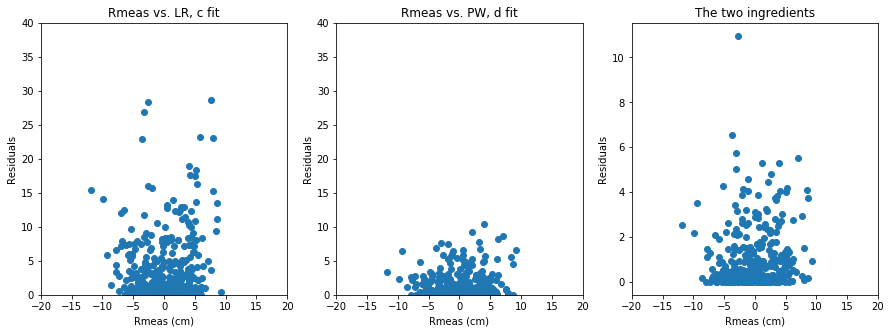

In [18]:
fig2, (LR2_2, PW2_2, ax3_2) = plt.subplots(1, 3, figsize=(15,5))

LR2_2.scatter(Rmeas, res1)
LR2_2.set_title('Rmeas vs. LR, c fit')
LR2_2.set_ylabel('Residuals')
LR2_2.set_xlabel('Rmeas (cm)')
LR2_2.set_xlim(-20,20); LR2_2.set_ylim(0,40)

PW2_2.scatter(Rmeas, res2) 
PW2_2.set_title('Rmeas vs. PW, d fit')
PW2_2.set_ylabel('Residuals')
PW2_2.set_xlabel('Rmeas (cm)')
PW2_2.set_xlim(-20,20); PW2_2.set_ylim(0,40)


ax3_2.scatter(Rmeas, res3)
ax3_2.set_title('The two ingredients')
ax3_2.set_ylabel('Residuals')
ax3_2.set_xlabel('Rmeas (cm)')
ax3_2.set_xlim(-20,20); LR_PW_2.set_ylim(0,40)

There is colinearity between the variables, so it is not appropriate to postulate with them
